## Creating Non Linear Model Architecture

In [10]:
from tensorflow.keras.models import Model
from keras.layers import Input, Dense

In [11]:
import pandas as pd

sample_data = pd.DataFrame({
    "gpa": [4, 3.2, 3.6],
    "dept": ["bct", "bce", "barch"],
    "gender" : ["M", "F", "M"],
    "salary" : [90000, 80000, 40000], # sample target for regression
    "rank" : ["A", "B", "A"] # sample label for classification
})

In [12]:
sample_data

,gpa,dept,gender,salary,rank
0,4.0,bct,M,90000,A
1,3.2,bce,F,80000,B
2,3.6,barch,M,40000,A


In [13]:
x = Input(shape=(3, ), name="input_layer")
h_1 = Dense(128, activation="relu", name="hidden_state_first")(x)
h_2 = Dense(64, activation="relu", name="hidden_state_2")(h_1)

output_1 = Dense(1, activation="linear", name="regression")(h_2) # this is for regression
output_2 = Dense(1, activation="sigmoid", name="classification")(h_2) # this is for classification

In [14]:
model = Model(
    inputs = x, # can be a list of input as well but here only single
    outputs = [output_1, output_2] # two different output for two different task
)

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hidden_state_first        │ (None, 128)            │            512 │ input_layer[0][0]      │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hidden_state_2 (Dense)    │ (None, 64)             │          8,256 │ hidden_state_first[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression (Dense)        │ (None, 1)              │             65 │ hidden_state_2[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 1)              │             65 │ hidden_state_2[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

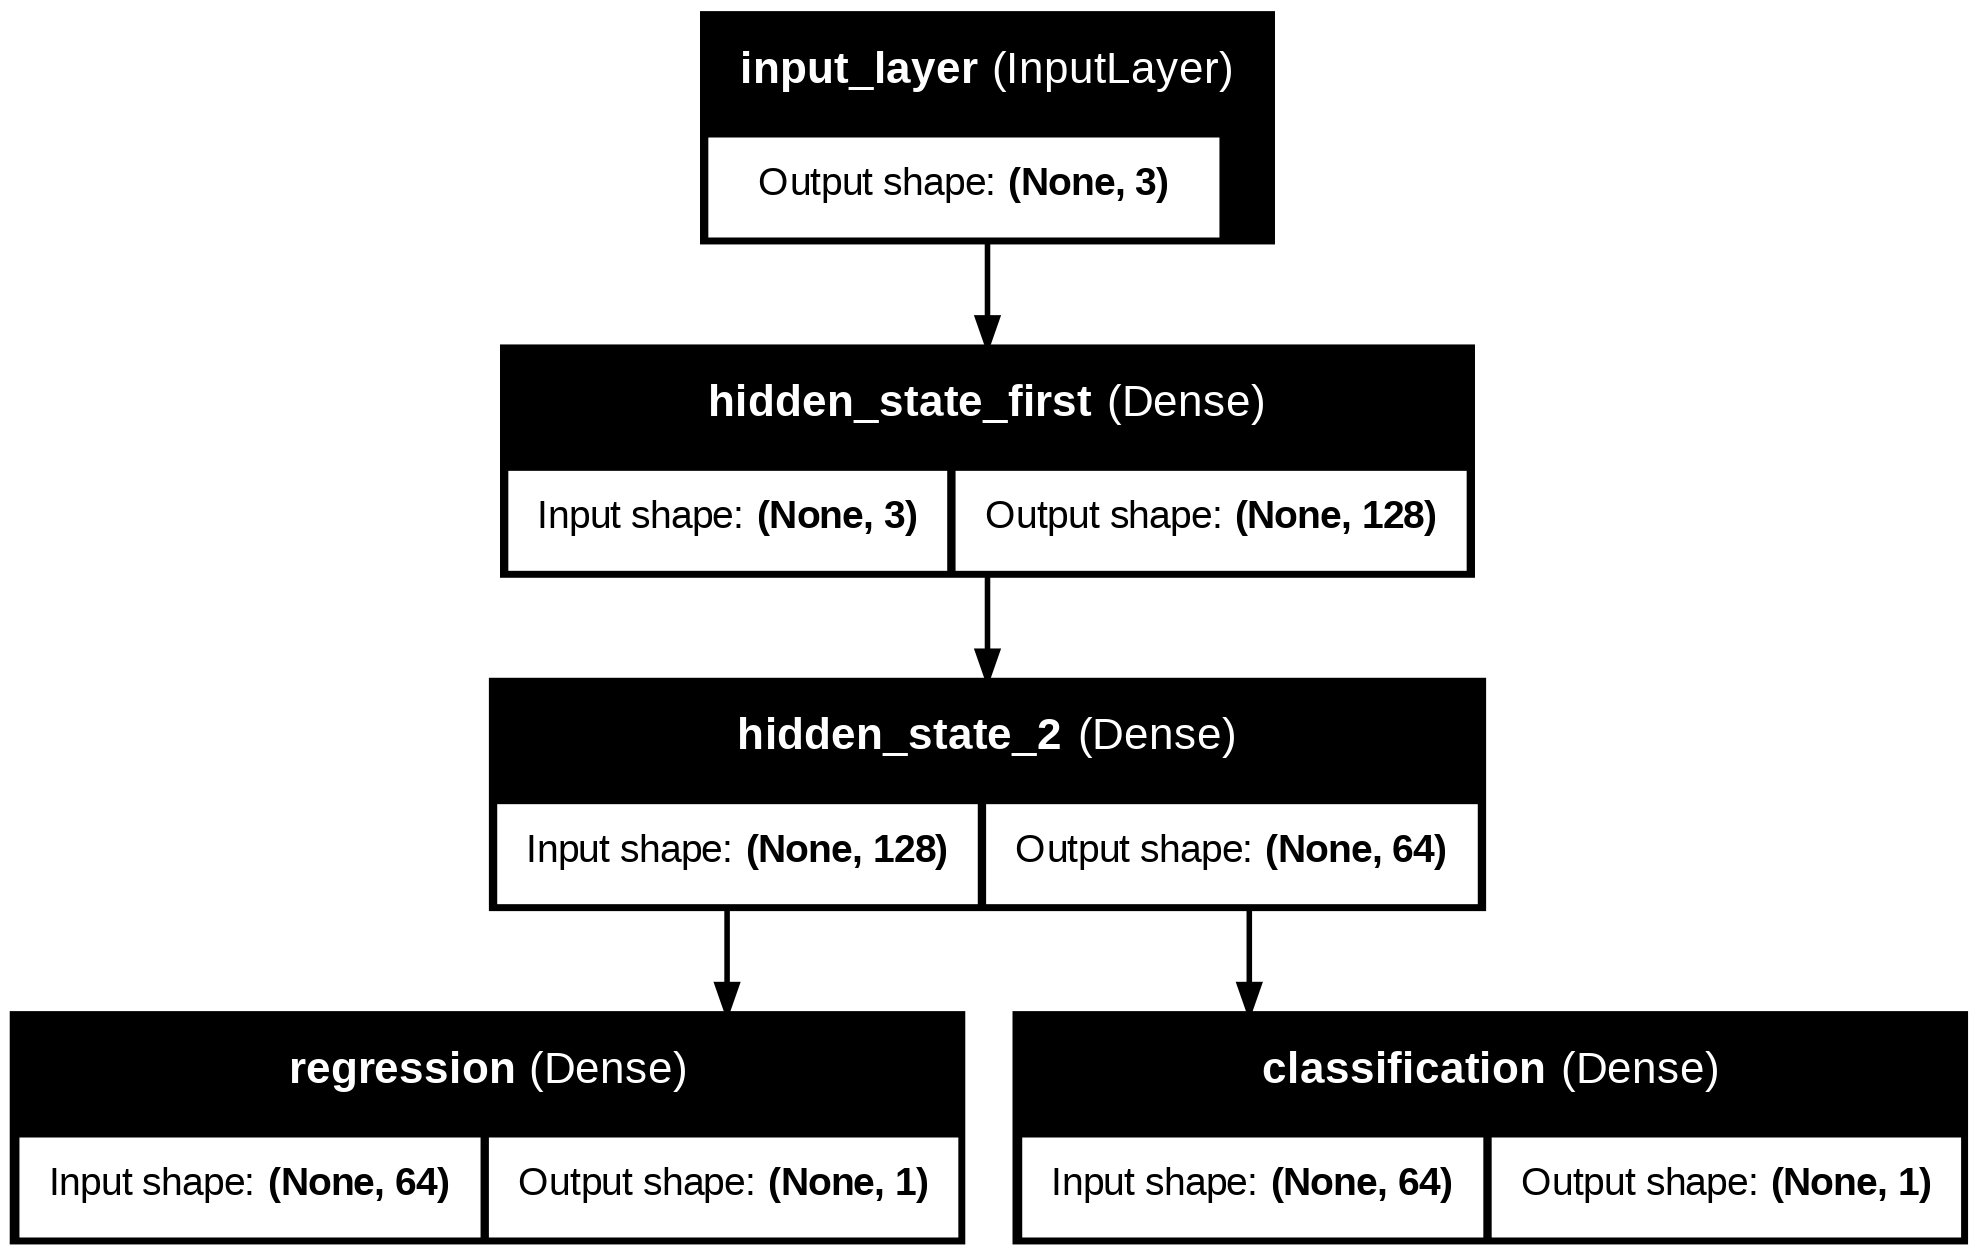

In [16]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

## Complex Architecture

In [17]:
from keras.layers import Input, Dense
from keras.models import Model

In [18]:
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [19]:
x = Dense(8, activation="relu")(inputA)
x1 = Dense(4, activation="relu")(x)

In [20]:
y = Dense(64, activation="relu")(inputB)
y1 = Dense(32, activation="relu")(y)
y2 = Dense(4, activation="relu")(y1)

In [21]:
from keras.layers import concatenate

combined = concatenate([x1, y2])

z = Dense(2, activation="relu")(combined)
z1 = Dense(1, activation="linear")(z)

In [22]:
model = Model(
    inputs = [inputA, inputB],
    outputs = z1
)

In [23]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │          8,256 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 8)              │            264 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 32)             │          2,080 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 4)              │             36 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 4)              │            132 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 8)              │              0 │ dense_8[0][0],         │
│ (Concatenate)             │                        │                │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 2)              │             18 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 1)              │              3 │ dense_12[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,789 (42.14 KB)

 Trainable params: 10,789 (42.14 KB)

 Non-trainable params: 0 (0.00 B)